<a href="https://colab.research.google.com/github/Renato-55/FakeNewsDetection/blob/main/FakeNewsDetectionProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load and store the dataset in the FakeNewsDetectionData


In [ ]:
#API Token
!echo '{"username":"renatobarbosa0707","key":"688080334f032395f65abb05549c245c"}' > ~/.kaggle/kaggle.json
!touch ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
#download dataset fromr kaggle
!kaggle competitions download fake-news
#create new directory to store the dataset from kaggle
!mkdir FakeNewsDetectionData
#unzip the data data from source_path to target_path
!unzip "/content/fake-news.zip" -d "/content/FakeNewsDetectionData"

## 2. Load data from the folder and make a simple analysis on the data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#path to data
path = "/content/FakeNewsDetectionData/"

#Load Data
train_data = pd.read_csv(path + "train.csv")
eval_data_x = pd.read_csv(path + "test.csv")
eval_data_y = pd.read_csv(path + "submit.csv")

Null values: 2554

The table id has 0
The table title has 558
The table author has 1957
The table text has 39
The table label has 0


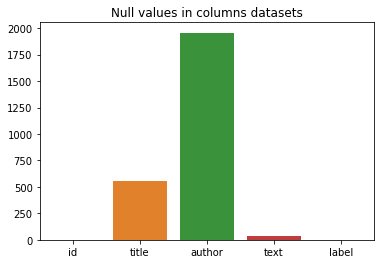

In [14]:
#data cleaning
null_val = train_data.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in train_data:
  features.append(x)
  null_values_table.append(train_data[x].isnull().sum())
  print(f"The table {x} has {train_data[x].isnull().sum()}")
 
sns.barplot(y=null_values_table,x=features)
plt.title("Null values in columns datasets")
plt.show()

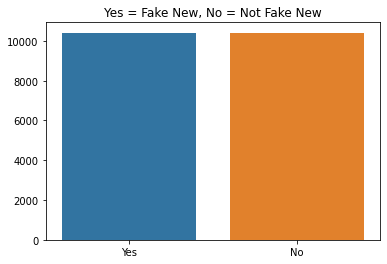

In [35]:
y = []
y.append(np.sum(train_data['label'] == 1))
y.append(np.sum(train_data['label'] == 0))

x = ['Yes','No']
sns.barplot(x=x,y=y)
plt.title("Yes = Fake New, No = Not Fake New")
plt.show()

## 3. Train the model whit the data provided